<a href="https://colab.research.google.com/github/happiness133-python/python/blob/main/Combined_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Google drive csatlakoztatása:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


HDD csv file import:

In [4]:
file_path = '/content/drive/MyDrive/python/HDD_CDD_2024/Combined_2024.csv'

consumption = pd.read_csv(
    file_path, parse_dates=['Időbélyeg'],
    on_bad_lines='skip', # Skip lines with errors
    sep=',',  # Uncomment and replace ';' with the actual delimiter if it's not a comma
    #skiprows=6  # This line skips the first 3 rows
)

In [5]:
consumption.head()

,Időbélyeg,Deregulációs POD - Technikai POD,Cím,Korrektor,Mérő,Órás korrigált fogyasztás [m3],Órás átlag hőmérséklet [Celsius]
0,2024-01-01 07:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,52.027,6.23
1,2024-01-01 09:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,53.762,6.4
2,2024-01-01 10:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,51.903,6.66
3,2024-01-01 11:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,53.700,6.56
4,2024-01-01 12:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,53.791,6.44


Hőmérséklet diagramm:

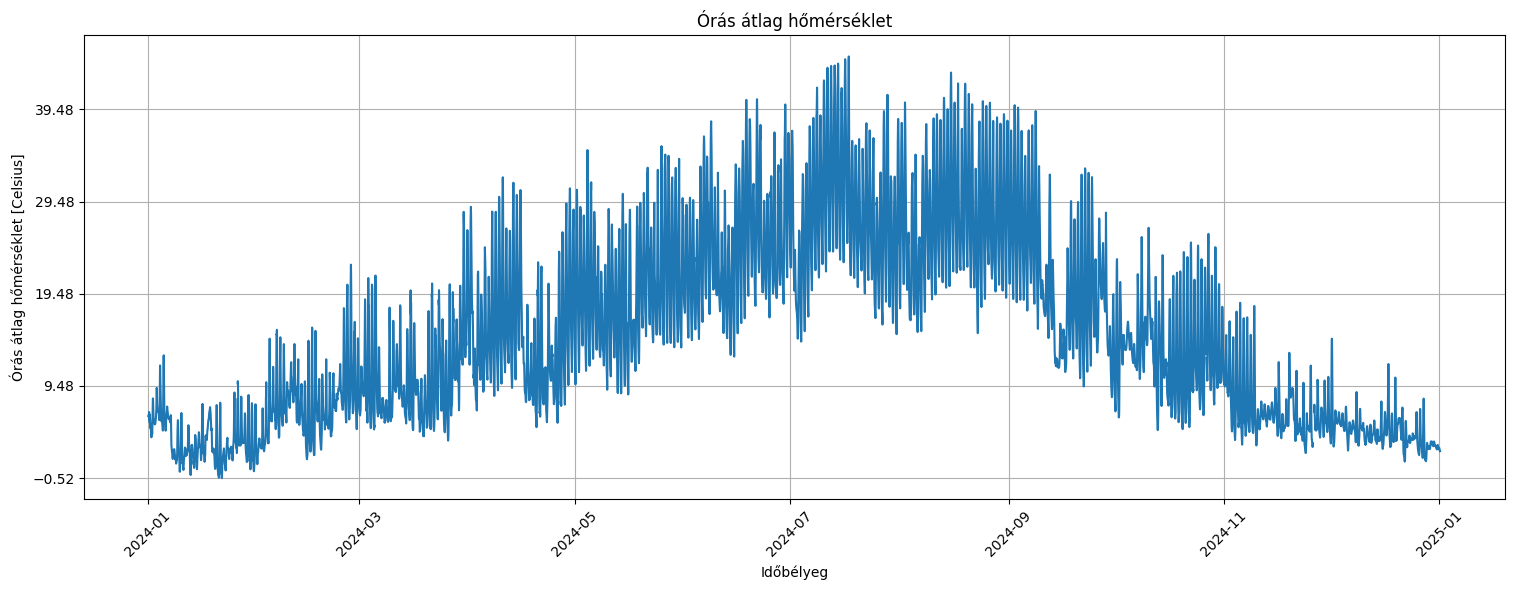

In [8]:
# Convert the column to numeric, coercing errors to NaN
consumption['Órás átlag hőmérséklet [Celsius]'] = pd.to_numeric(consumption['Órás átlag hőmérséklet [Celsius]'], errors='coerce')

# Hőmérséklet diagramm:
plt.figure(figsize=(15, 6))
plt.plot(consumption['Időbélyeg'], consumption['Órás átlag hőmérséklet [Celsius]'])
plt.xlabel('Időbélyeg')
plt.ylabel('Órás átlag hőmérséklet [Celsius]')
plt.title('Órás átlag hőmérséklet')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate min and max after converting to numeric
min_temp = consumption['Órás átlag hőmérséklet [Celsius]'].min()
max_temp = consumption['Órás átlag hőmérséklet [Celsius]'].max()

# Set y-ticks using the numeric min and max
plt.yticks(np.arange(min_temp, max_temp + 1, 10))

plt.show()

Éves átlag hőmérséklet:

In [12]:
yearly_average_temperature = consumption['Órás átlag hőmérséklet [Celsius]'].mean()
print(yearly_average_temperature)

15.373572649572651
